<a href="https://colab.research.google.com/github/Akash-mahandargi/R-programing/blob/main/EDA_ASSIGNMENT_4_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df=pd.read_csv("/content/Cardiotocographic.csv")

In [3]:
# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop missing values if any
df = df.dropna()

# Check data types and convert if necessary
df = df.astype(float)

# Check for outliers using z-score
z_scores = np.abs(stats.zscore(df))
df_no_outliers = df[(z_scores < 3).all(axis=1)]


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-n

In [4]:
#statistical Summary
#generate statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001

In [5]:
#calculate median and interquartile range
median=df.mean()
iqr=df.quantile(0.75)-df.quantile(0.25)


print("\nMedian:\n",median)
print("\nInterquartile Range:\n",iqr)



Median:
 LB          133.343598
AC            0.003202
FM            0.009963
UC            0.004388
DL            0.001892
DS            0.000003
DP            0.000175
ASTV         46.996929
MSTV          1.361006
ALTV         10.353647
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

Interquartile Range:
 LB          14.000000
AC           0.005650
FM           0.002554
UC           0.004698
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


<Figure size 2000x1500 with 0 Axes>

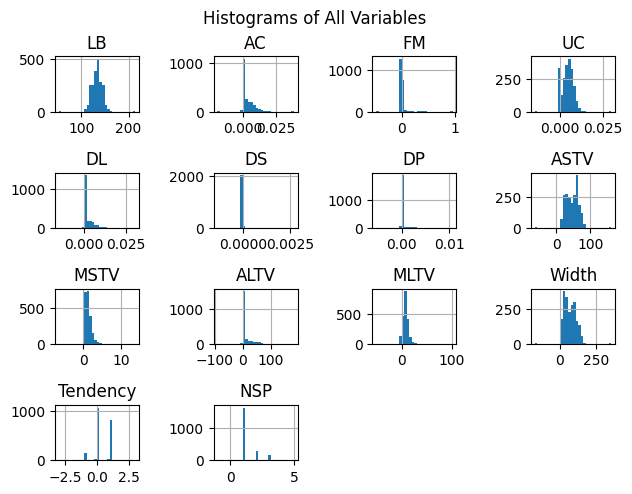

In [8]:
#3 Data Visualization
#Histogram

plt.figure(figsize=(20,15))
df.hist(bins=30)
plt.tight_layout()
plt.suptitle("Histograms of All Variables",y=1.02)
plt.show()

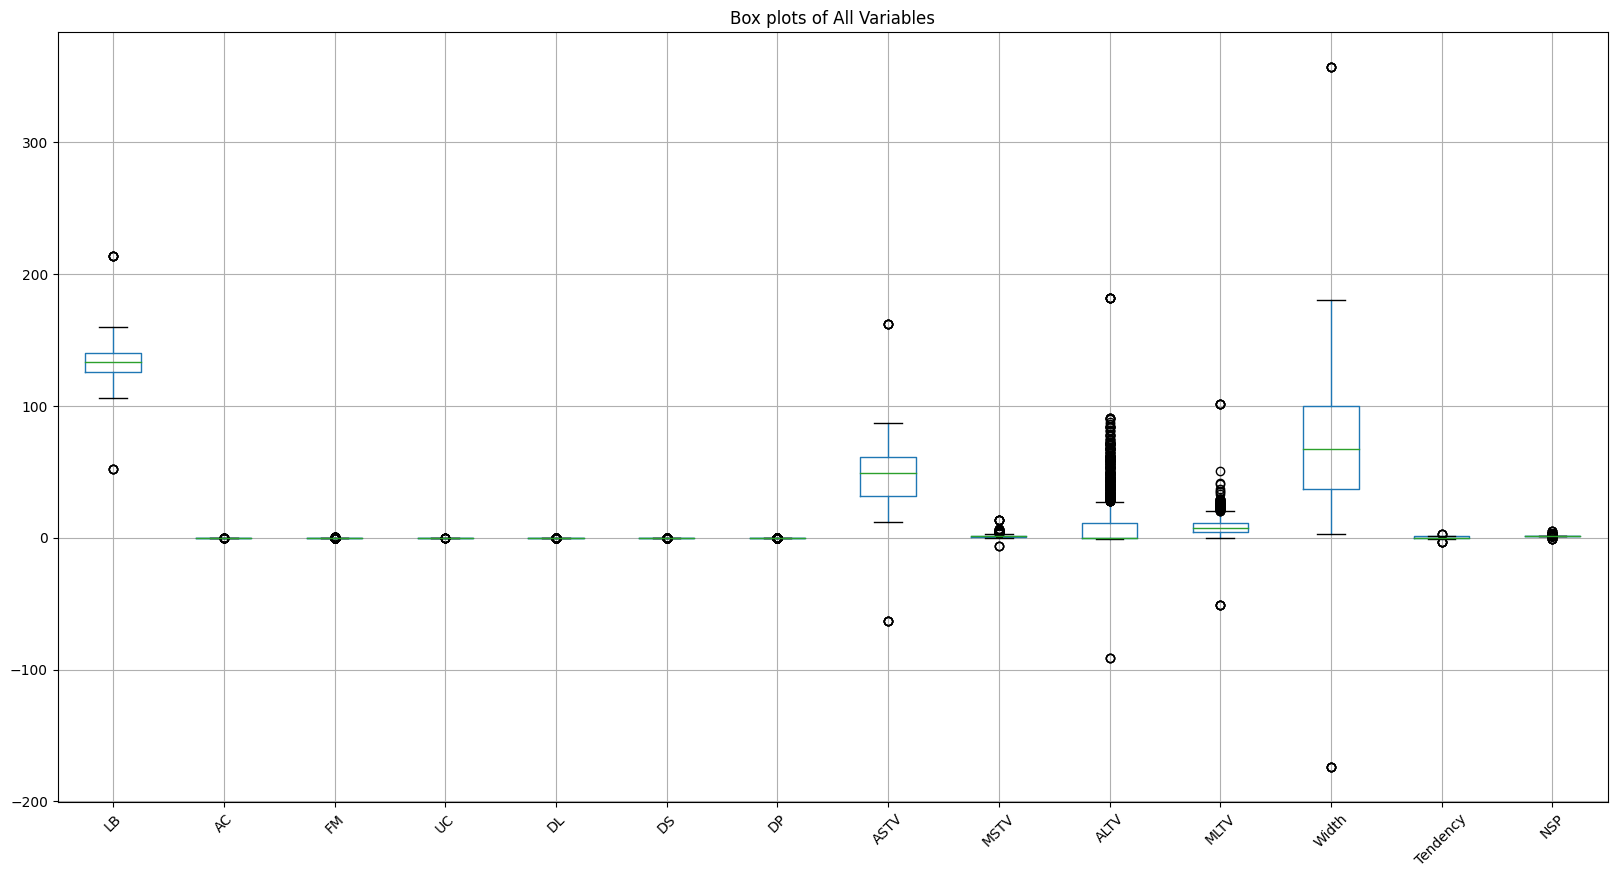

In [9]:
#Box plots

plt.figure(figsize=(20,10))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Box plots of All Variables")
plt.show()

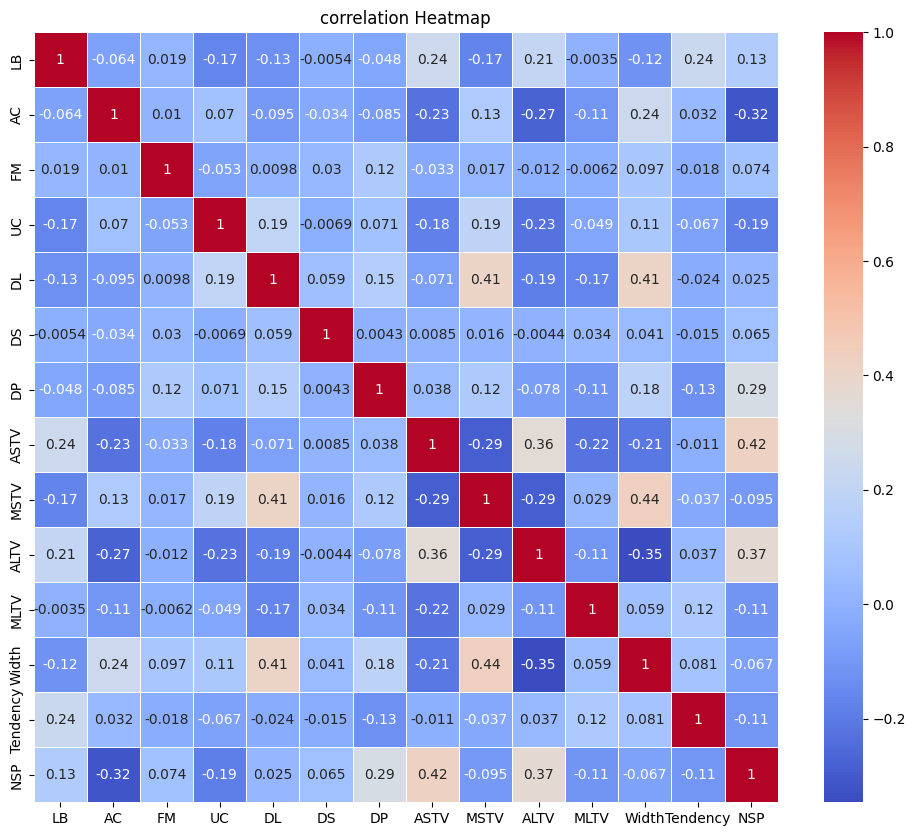

In [11]:
#correlation Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

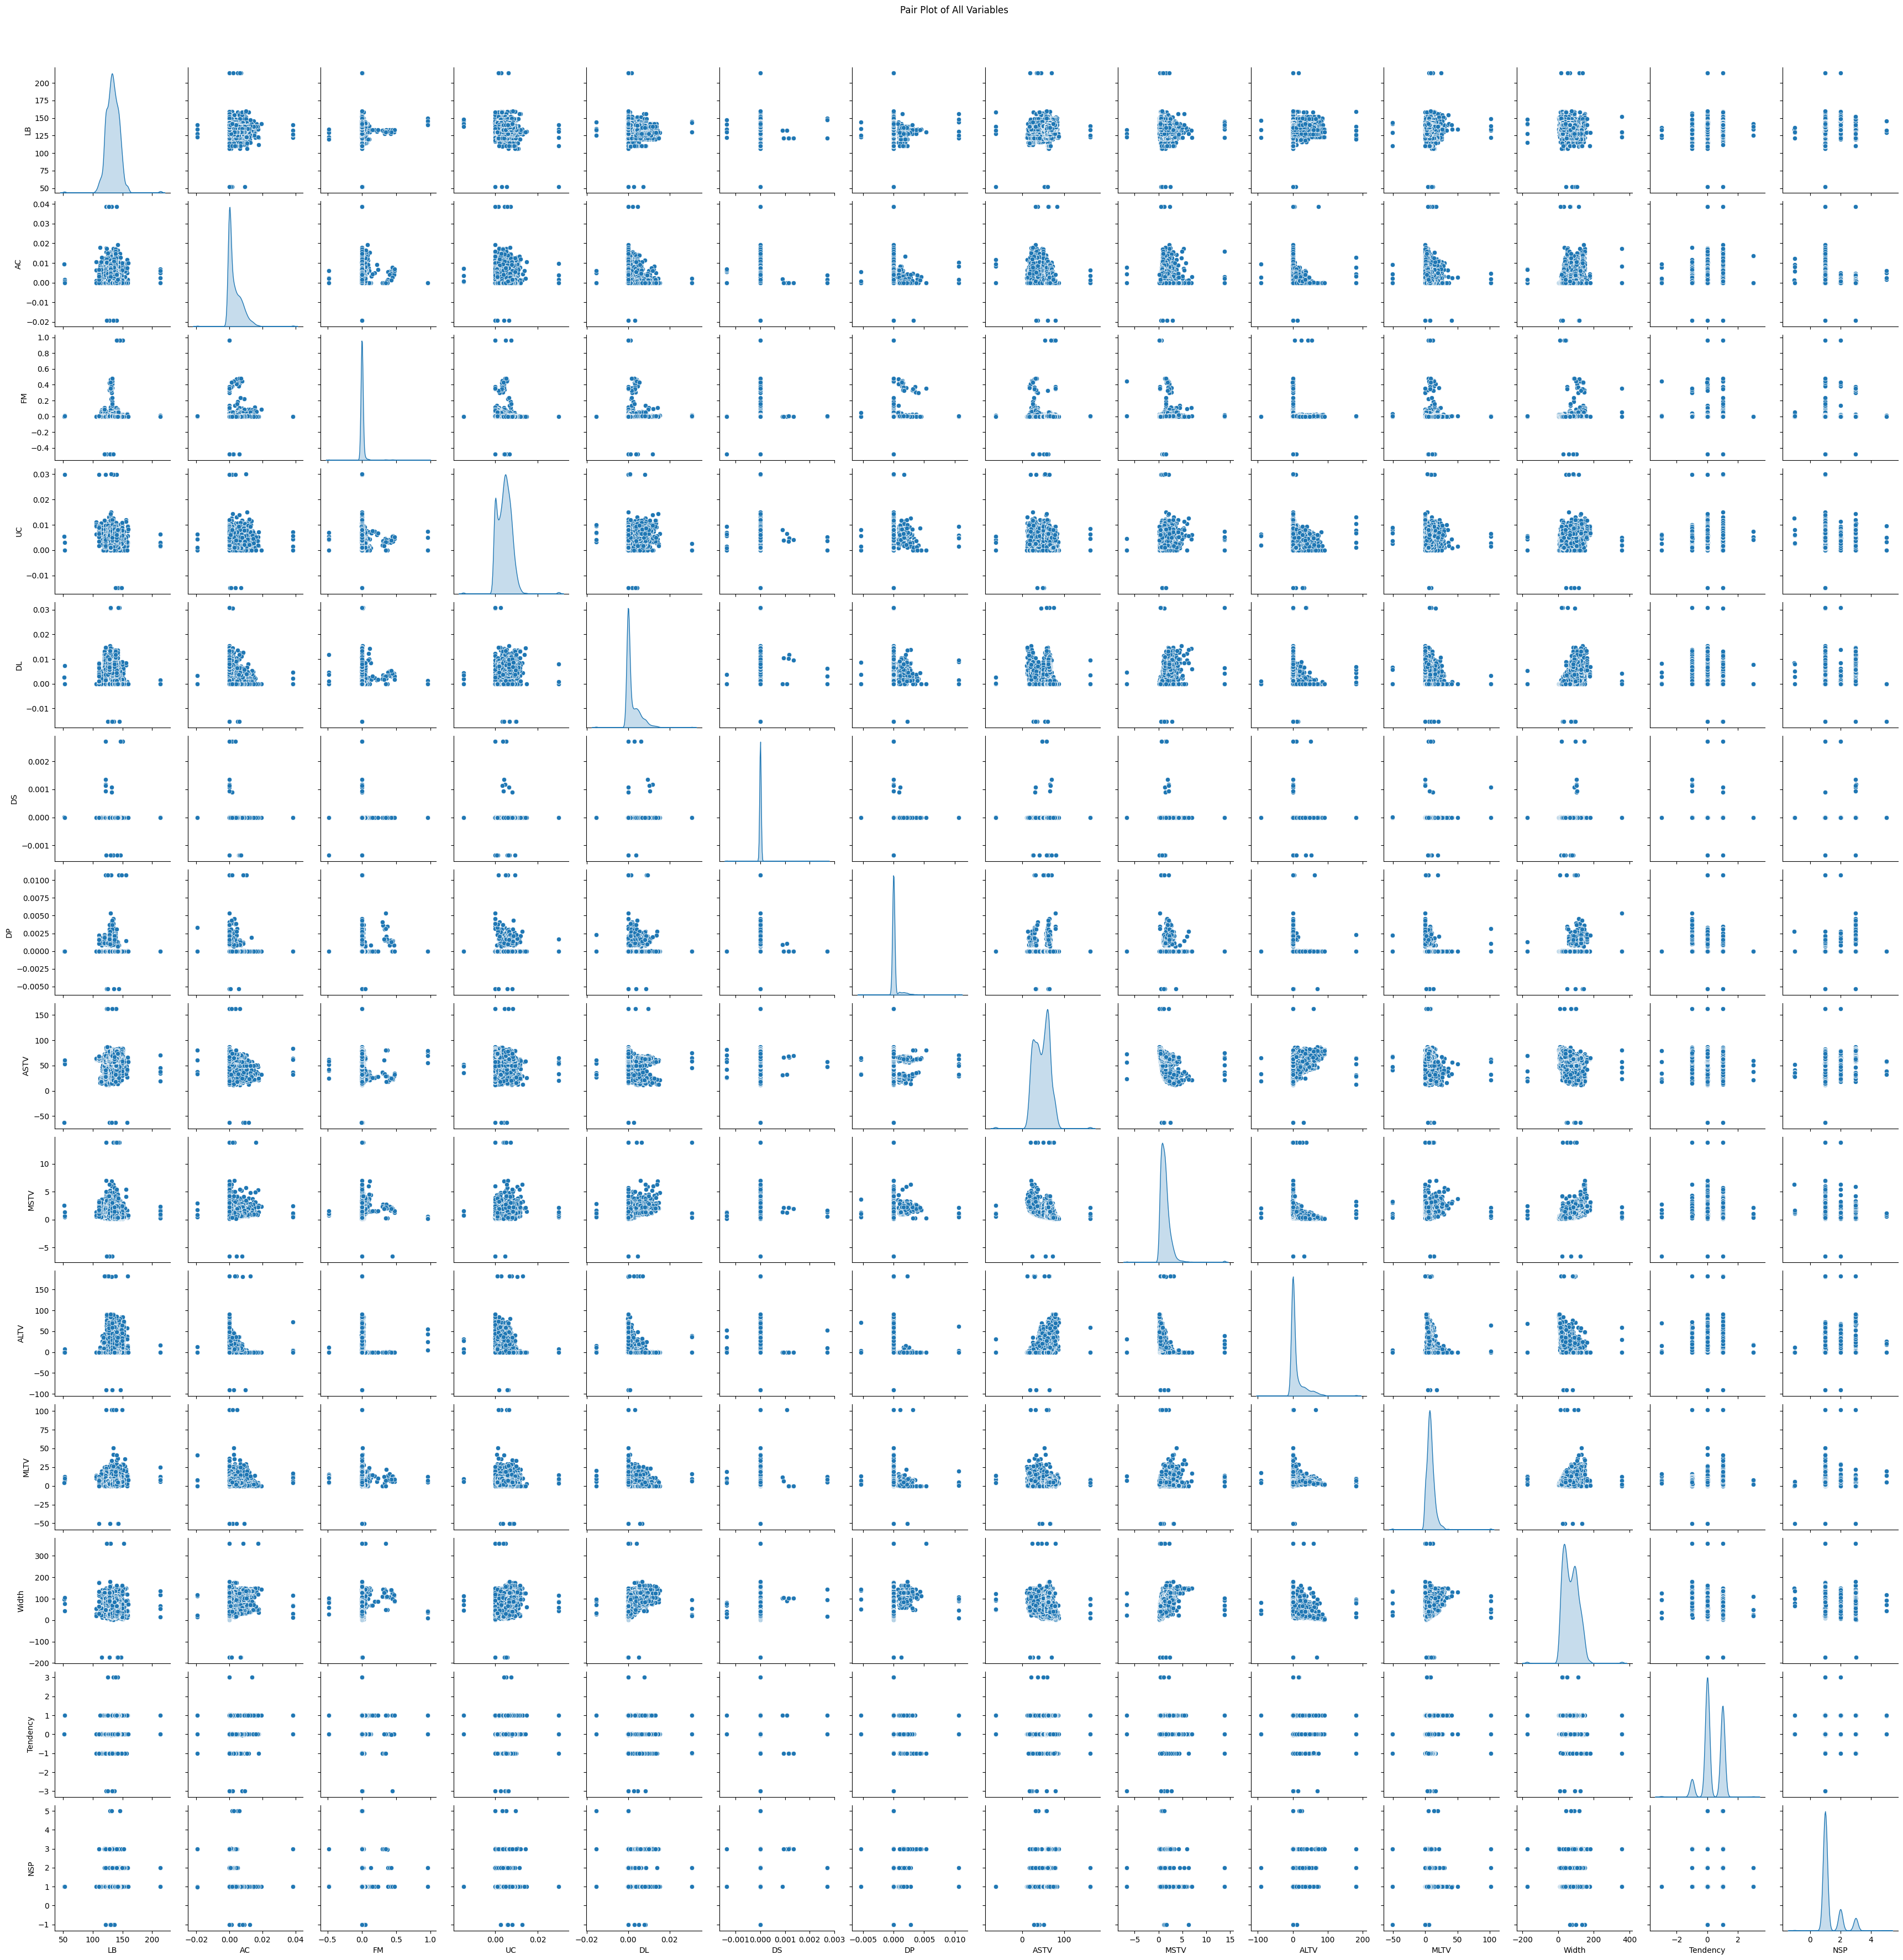

In [12]:
#pair plot
sns.pairplot(df,diag_kind='kde')
plt.suptitle('Pair Plot of All Variables',y=1.02)
plt.show()

In [13]:
#4Pattern Recognition and Insights

#Identity strong correlation
corr_matrix=df.corr()
strong_corr=corr_matrix[abs(corr_matrix)>0.7]
print("\nStrong correlation")
print(strong_corr)



Strong correlation
           LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN  NaN  NaN 

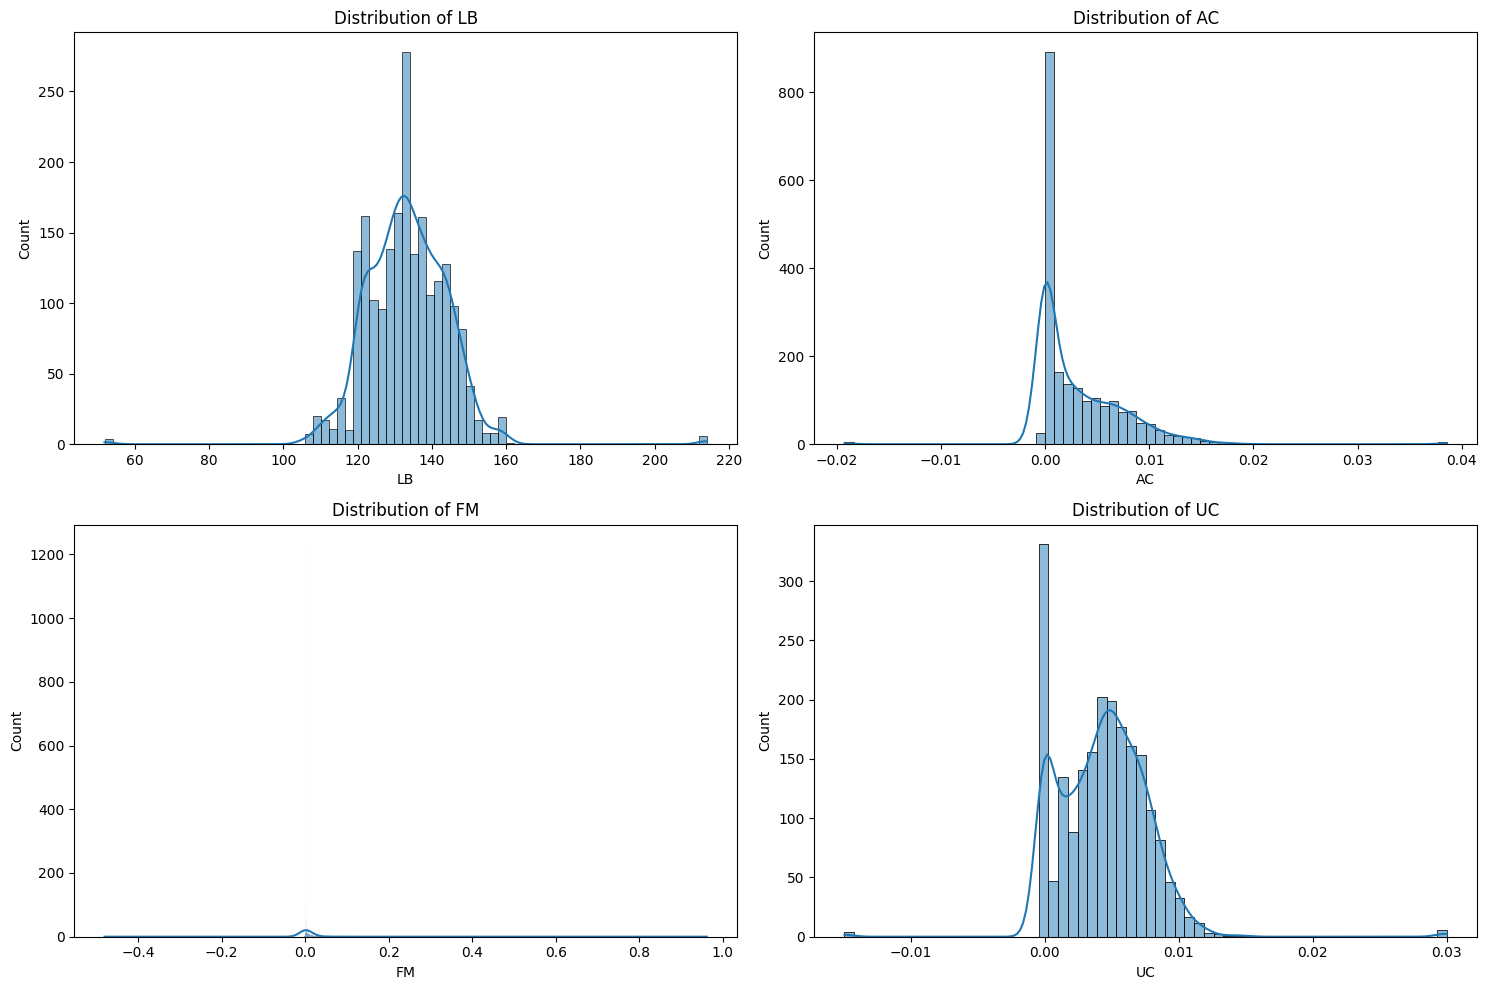

In [19]:
#5 Additional Analysis
#Distribustion of key variables
key_vars=['LB','AC','FM','UC']
fig, axes = plt.subplots(2,2,figsize=(15,10))
for i , var in enumerate(key_vars):
  sns.histplot(df[var],kde=True,ax=axes[i//2,i%2])
  axes[i//2,i%2].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

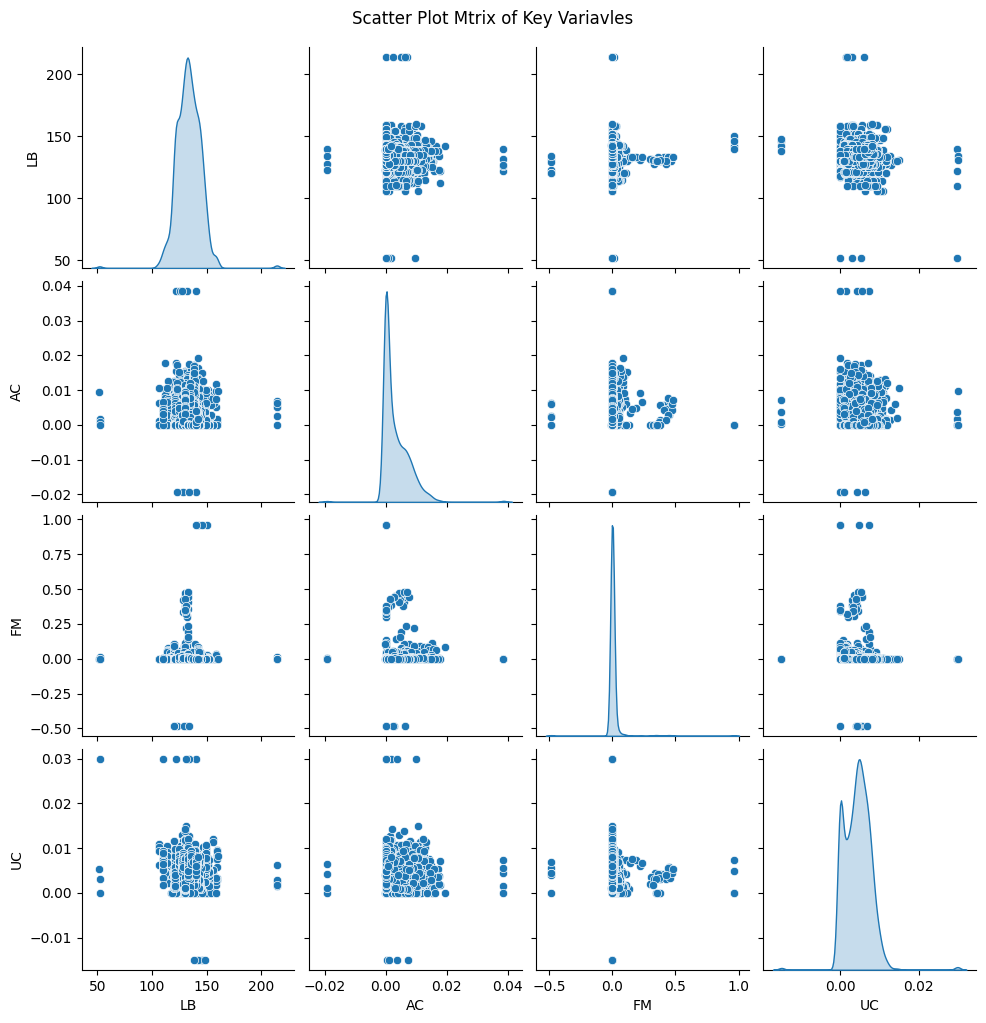

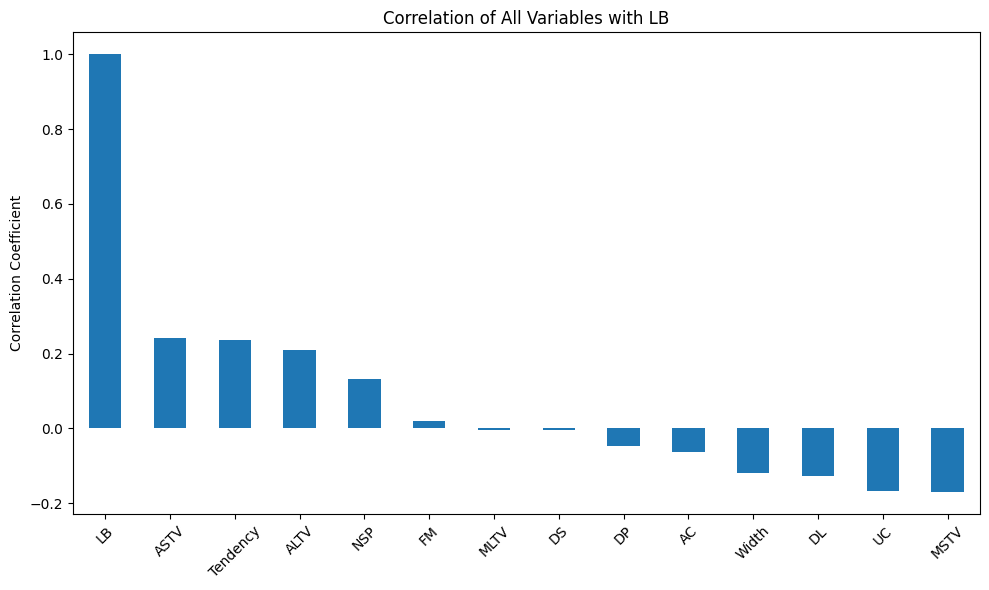

nCorrelation with LB:
LB          1.000000
ASTV        0.242625
Tendency    0.236864
ALTV        0.210728
NSP         0.131843
FM          0.018777
MLTV       -0.003457
DS         -0.005438
DP         -0.047724
AC         -0.063830
Width      -0.118425
DL         -0.126959
UC         -0.166570
MSTV       -0.170473
Name: LB, dtype: float64


In [22]:
#scatter plot matrix of key variabes
sns.pairplot(df[key_vars],diag_kind='kde')
plt.suptitle('Scatter Plot Mtrix of Key Variavles',y=1.02)
plt.show()

#correlation of all variables with LB
ib_corr=df.corr()['LB'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
ib_corr.plot(kind='bar')
plt.title('Correlation of All Variables with LB')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("nCorrelation with LB:")
print(ib_corr)


In [23]:
#6Summary statistics for Report
print("\nSummary Statistics for Report:")
print(df.describe())
print(df.mean())

print("\nStandart Deviation:")
print(df.std())

print("\nSkewbess:")
print(df.skew())

print("\nKurtosis:")
print(df.kurtosis())



Summary Statistics for Report:
                LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min  

In [25]:
df.to_csv('processed_cardiographic.csv',index=False)
print("\nProcessed data saved to 'processed_cardiographic.csv'")


Processed data saved to 'processed_cardiographic.csv'
